In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
import itertools

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Data/Data IPM Jawa Tengah Python.xlsx')

In [ ]:
df.head()

,Kabupaten/Kota,Tahun,UHH,HLS,RLS,PPK,IPM
0,Kabupaten Cilacap,2010-01-01,72.45,10.56,6.26,8520.27,64.18
1,Kabupaten Cilacap,2011-01-01,72.55,10.71,6.27,8800.85,64.73
2,Kabupaten Cilacap,2012-01-01,72.65,11.34,6.28,8969.12,65.72
3,Kabupaten Cilacap,2013-01-01,72.75,11.98,6.43,9070.61,66.80
4,Kabupaten Cilacap,2014-01-01,72.80,12.27,6.48,9091.04,67.25


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Kabupaten/Kota  455 non-null    object        
 1   Tahun           455 non-null    datetime64[ns]
 2   UHH             455 non-null    float64       
 3   HLS             455 non-null    float64       
 4   RLS             455 non-null    float64       
 5   PPK             455 non-null    float64       
 6   IPM             455 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 25.0+ KB


In [ ]:
df.describe()

,UHH,HLS,RLS,PPK,IPM
count,455.000000,455.000000,455.000000,455.000000,455.000000
mean,74.592813,12.355934,7.440813,10258.167231,70.386769
std,1.978624,1.095308,1.304181,1848.801670,4.991907
min,67.290000,9.720000,4.940000,6258.620000,58.640000
25%,73.465000,11.690000,6.500000,8995.590000,66.970000
50%,74.530000,12.280000,7.200000,10048.000000,69.870000
75%,76.035000,12.910000,8.025000,11251.845000,73.270000
max,77.820000,15.540000,10.950000,16351.000000,84.350000


In [ ]:
df.isna().isnull()


,Kabupaten/Kota,Tahun,UHH,HLS,RLS,PPK,IPM
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
450,False,False,False,False,False,False,False
451,False,False,False,False,False,False,False
452,False,False,False,False,False,False,False
453,False,False,False,False,False,False,False


In [ ]:
df.shape

(455, 7)

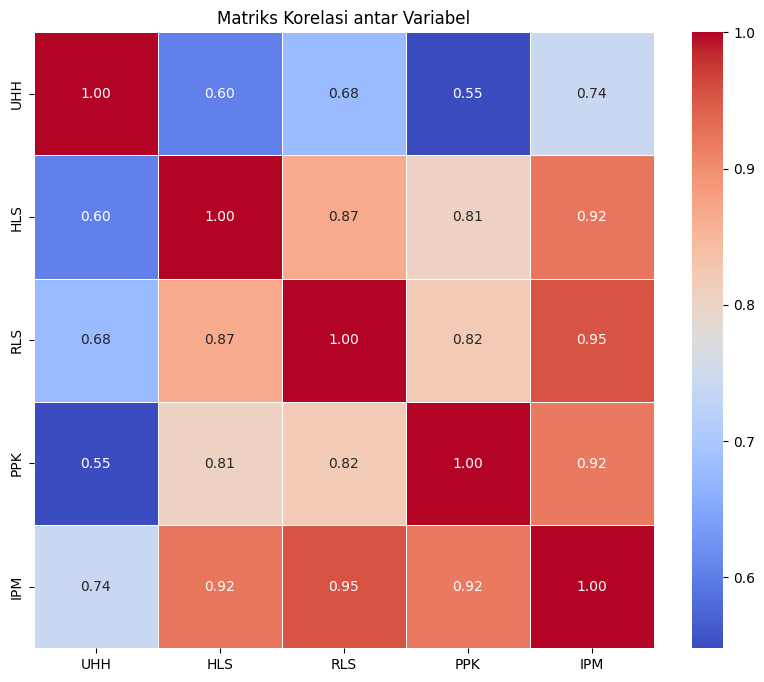

Korelasi tertinggi dengan variabel target ( IPM ):
IPM    1.000000
RLS    0.952493
HLS    0.922975
PPK    0.919023
UHH    0.741865
Name: IPM, dtype: float64


In [ ]:
def correlation_matrix():
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Matriks Korelasi antar Variabel")
    plt.show()

def highest_correlation_with_target(target_variable):
    correlations = df.corr()[target_variable].sort_values(ascending=False)
    print("Korelasi tertinggi dengan variabel target (", target_variable, "):")
    print(correlations)

correlation_matrix()
target_variable = 'IPM'
highest_correlation_with_target(target_variable)

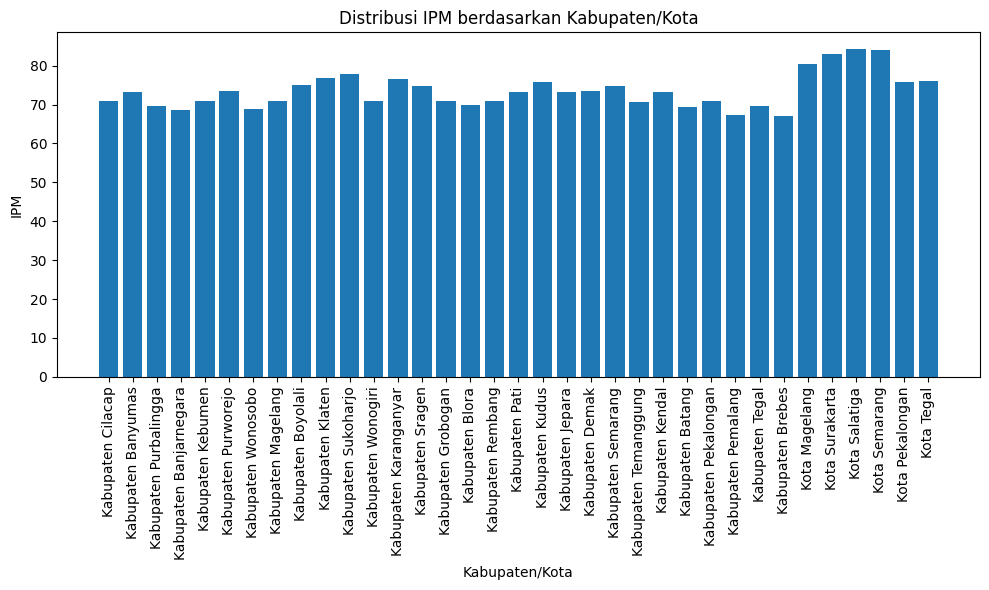

In [ ]:
def plot_kabupaten_kota_distribution():
    plt.figure(figsize=(10, 6))
    plt.bar(df['Kabupaten/Kota'], df['IPM'])
    plt.xticks(rotation=90)
    plt.title('Distribusi IPM berdasarkan Kabupaten/Kota')
    plt.xlabel('Kabupaten/Kota')
    plt.ylabel('IPM')
    plt.tight_layout()
    plt.show()

plot_kabupaten_kota_distribution()

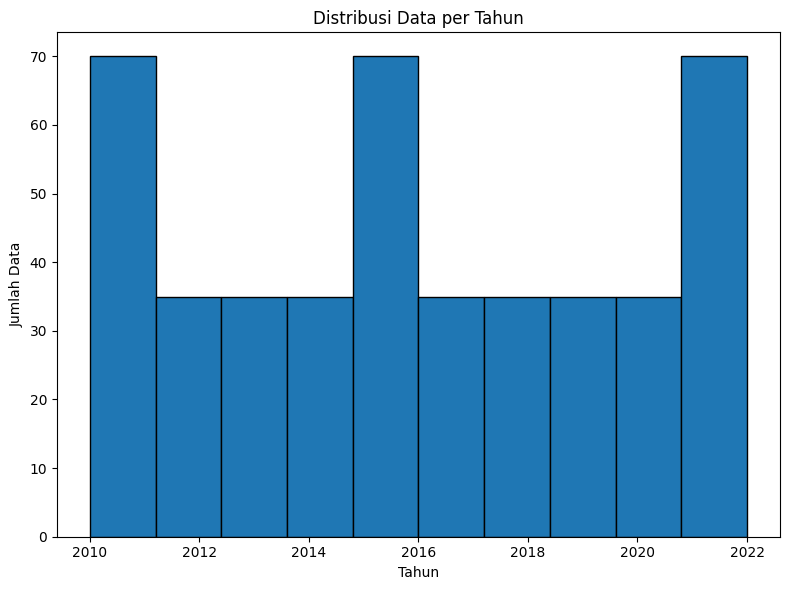

In [ ]:
def plot_tahun_distribution():
    plt.figure(figsize=(8, 6))
    plt.hist(df['Tahun'], bins=10, edgecolor='k')
    plt.title('Distribusi Data per Tahun')
    plt.xlabel('Tahun')
    plt.ylabel('Jumlah Data')
    plt.tight_layout()
    plt.show()
plot_tahun_distribution()

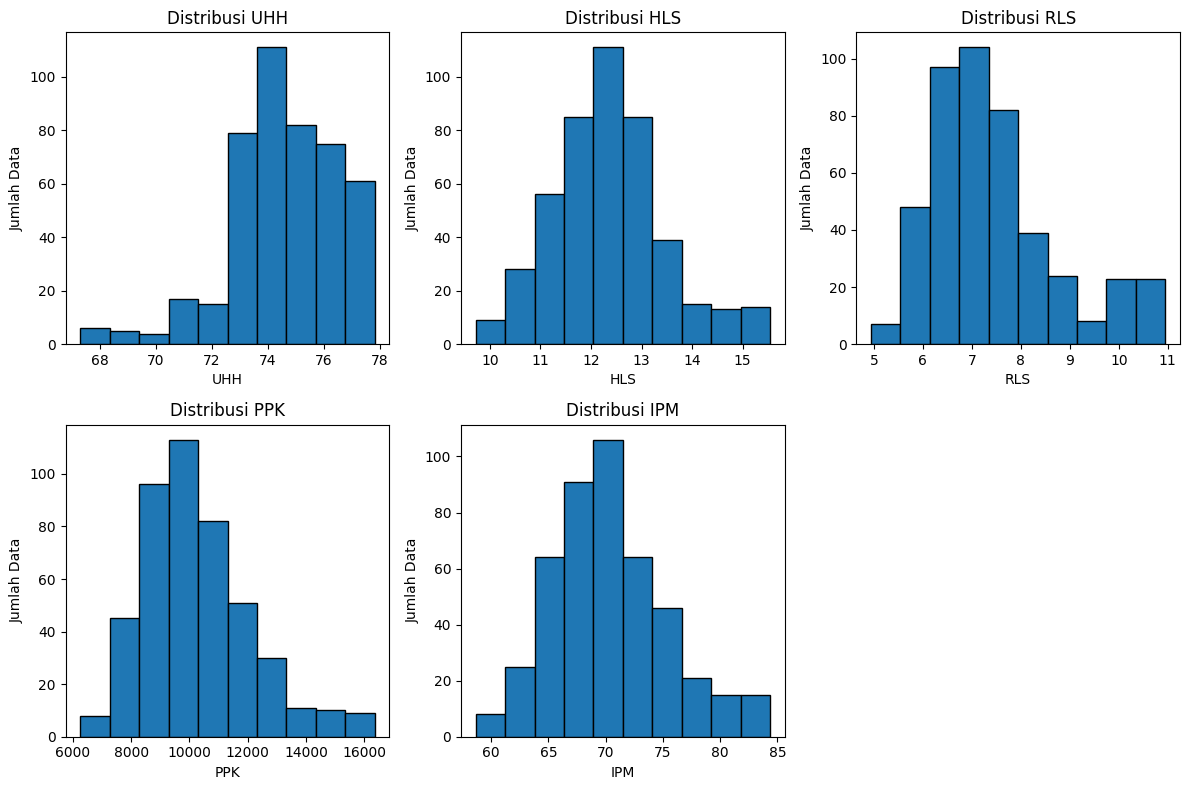

In [ ]:
def plot_other_distributions():
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 3, 1)
    plt.hist(df['UHH'], edgecolor='k')
    plt.title('Distribusi UHH')
    plt.xlabel('UHH')
    plt.ylabel('Jumlah Data')

    plt.subplot(2, 3, 2)
    plt.hist(df['HLS'], edgecolor='k')
    plt.title('Distribusi HLS')
    plt.xlabel('HLS')
    plt.ylabel('Jumlah Data')

    plt.subplot(2, 3, 3)
    plt.hist(df['RLS'], edgecolor='k')
    plt.title('Distribusi RLS')
    plt.xlabel('RLS')
    plt.ylabel('Jumlah Data')

    plt.subplot(2, 3, 4)
    plt.hist(df['PPK'], edgecolor='k')
    plt.title('Distribusi PPK')
    plt.xlabel('PPK')
    plt.ylabel('Jumlah Data')

    plt.subplot(2, 3, 5)
    plt.hist(df['IPM'], edgecolor='k')
    plt.title('Distribusi IPM')
    plt.xlabel('IPM')
    plt.ylabel('Jumlah Data')

    plt.tight_layout()
    plt.show()

plot_other_distributions()

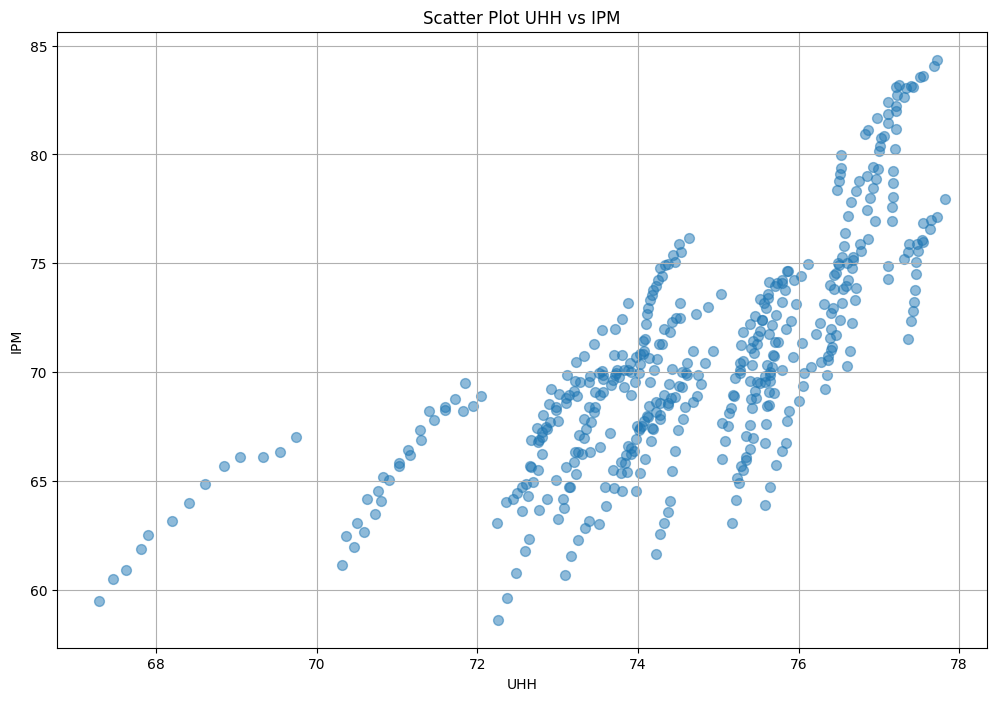

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(df['UHH'], df['IPM'], s=50, alpha=0.5)
plt.title('Scatter Plot UHH vs IPM')
plt.xlabel('UHH')
plt.ylabel('IPM')
plt.grid(True)
plt.show()

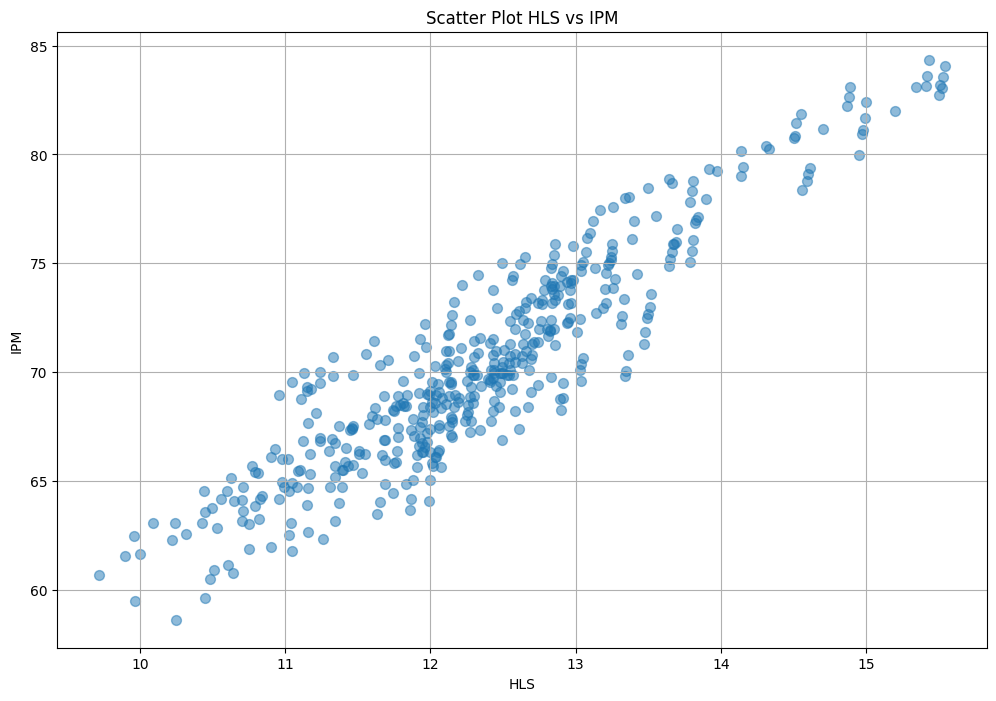

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(df['HLS'], df['IPM'], s=50, alpha=0.5)
plt.title('Scatter Plot HLS vs IPM')
plt.xlabel('HLS')
plt.ylabel('IPM')
plt.grid(True)
plt.show()

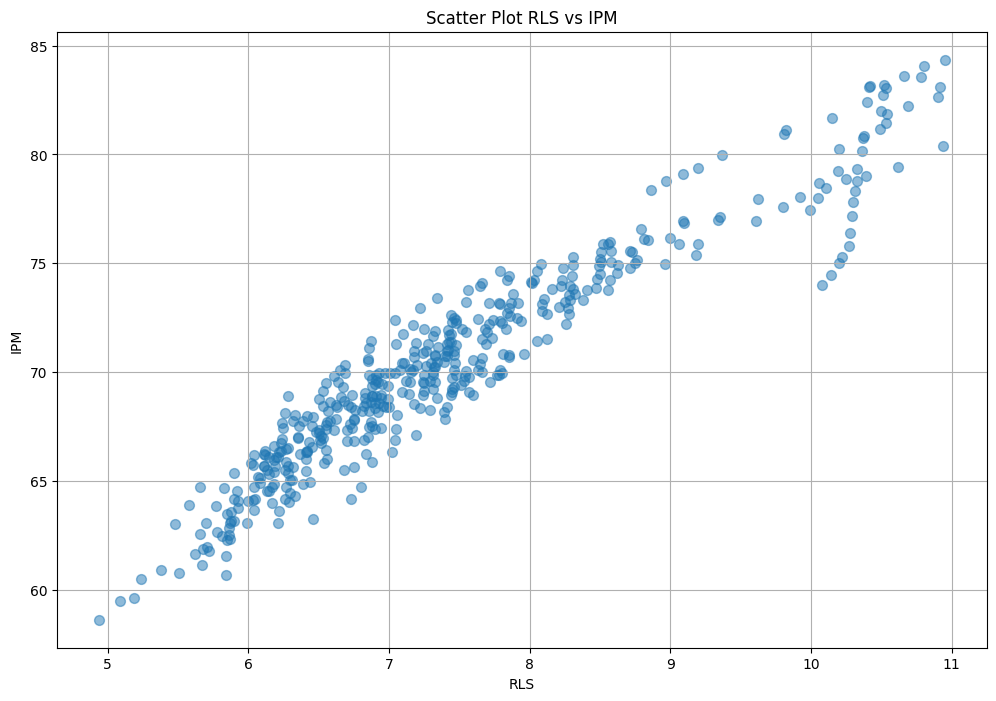

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(df['RLS'], df['IPM'], s=50, alpha=0.5)
plt.title('Scatter Plot RLS vs IPM')
plt.xlabel('RLS')
plt.ylabel('IPM')
plt.grid(True)
plt.show()

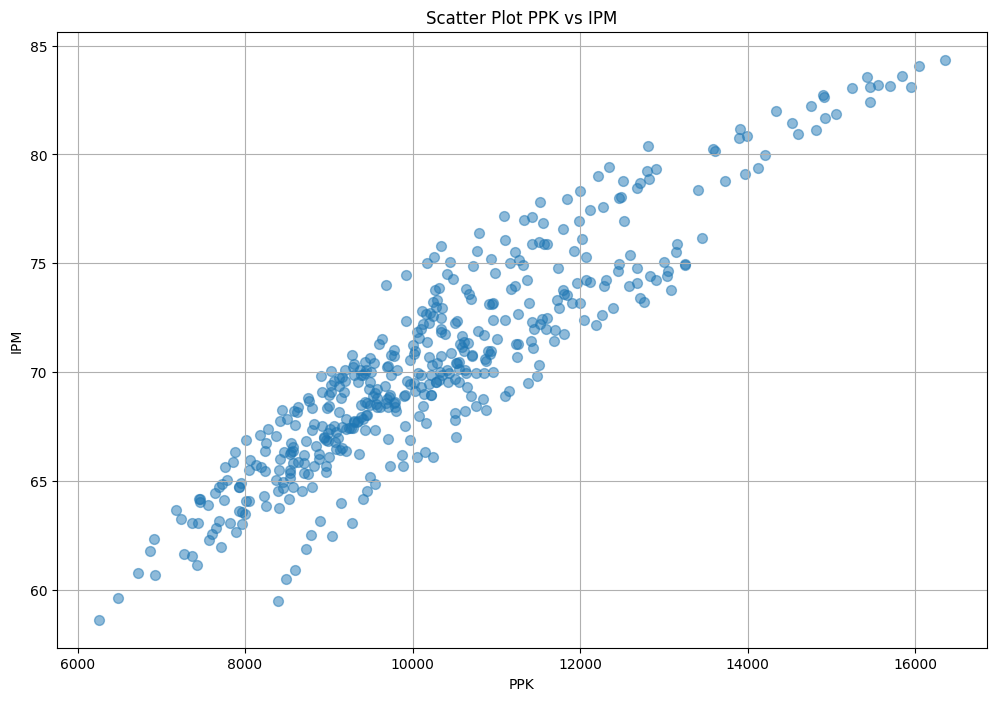

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(df['PPK'], df['IPM'], s=50, alpha=0.5)
plt.title('Scatter Plot PPK vs IPM')
plt.xlabel('PPK')
plt.ylabel('IPM')
plt.grid(True)
plt.show()

Text(0, 0.5, 'IPM')

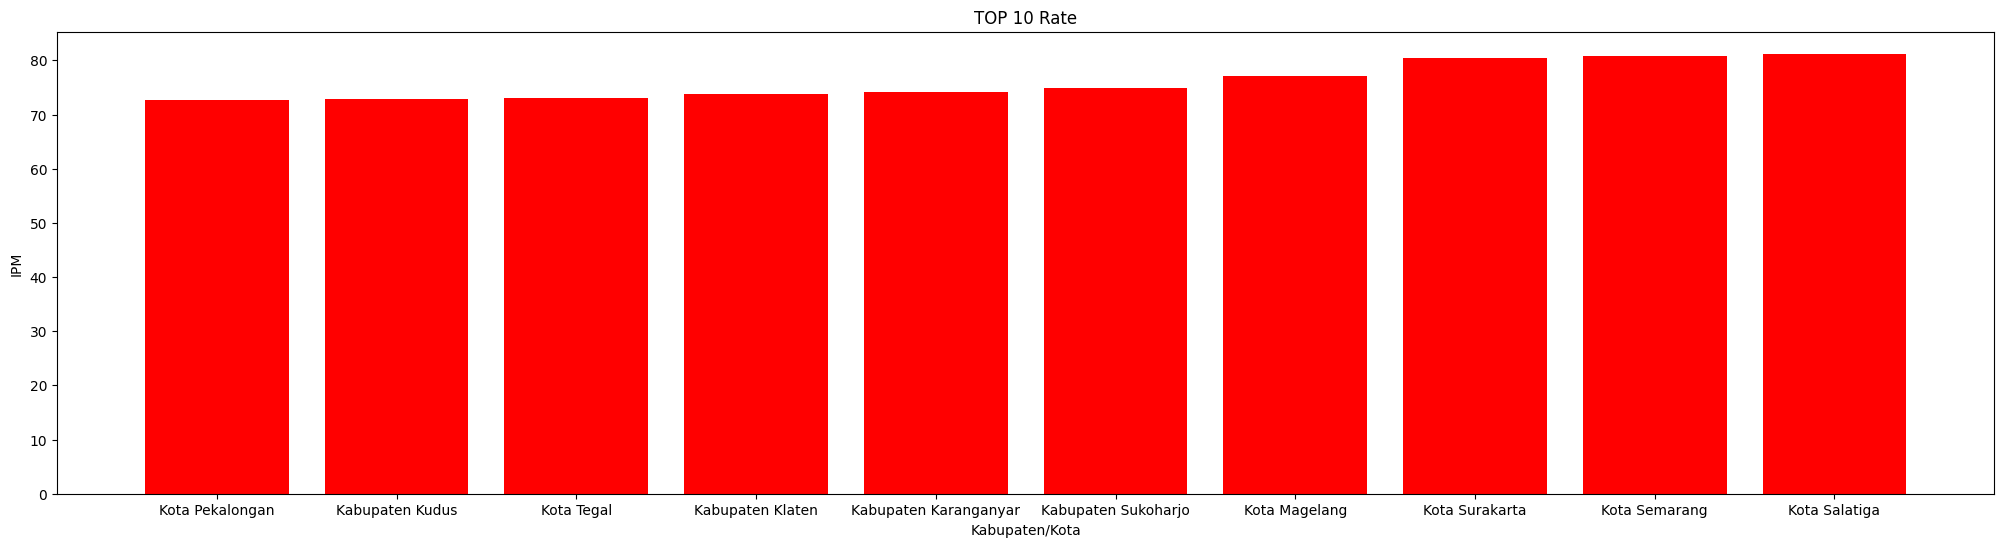

In [ ]:
top10_state = df.groupby('Kabupaten/Kota').mean().sort_values('IPM').tail(10)
top10_state
plt.figure(figsize = (25,6))
plt.bar(top10_state.index, top10_state['IPM'] , color='red')
plt.title('TOP 10 Rate')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('IPM')

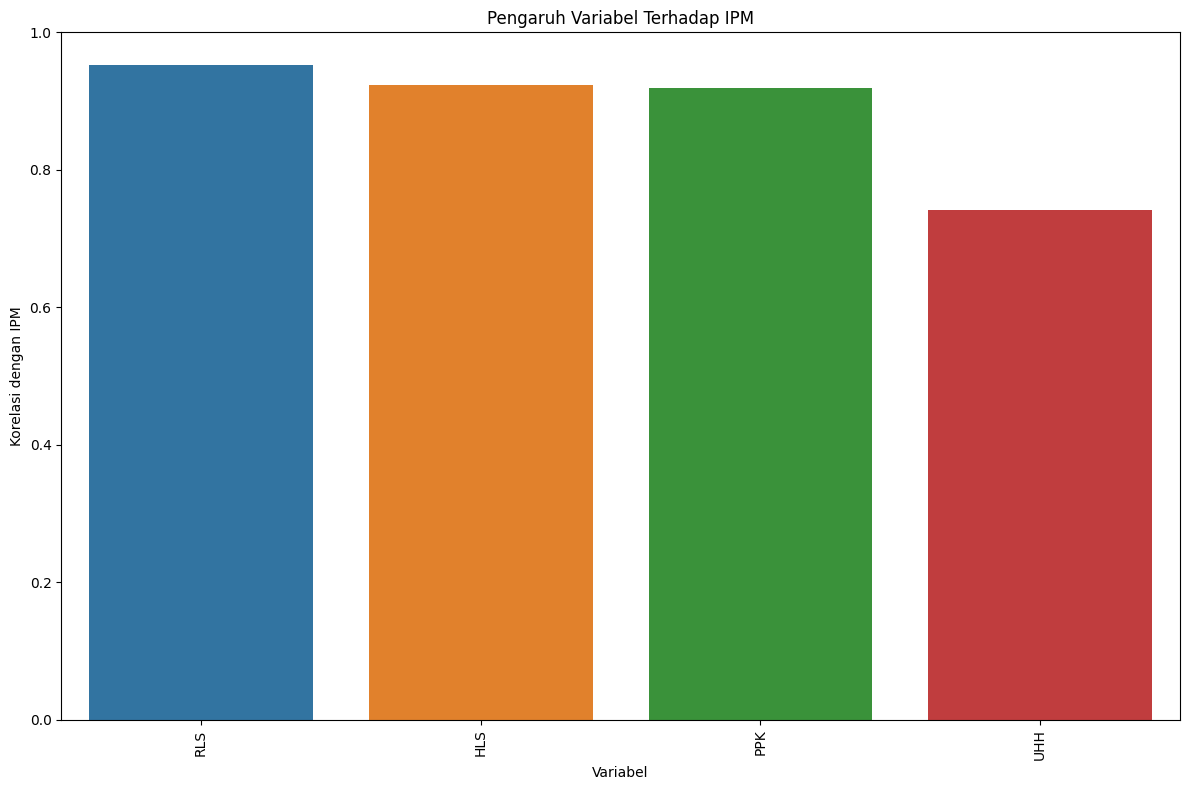

In [ ]:
correlation_matrix = df.corr()
correlation_with_ipm = correlation_matrix['IPM'].drop('IPM').sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_with_ipm.index, y=correlation_with_ipm.values)
plt.xticks(rotation=90)
plt.title('Pengaruh Variabel Terhadap IPM')
plt.xlabel('Variabel')
plt.ylabel('Korelasi dengan IPM')
plt.tight_layout()
plt.show()

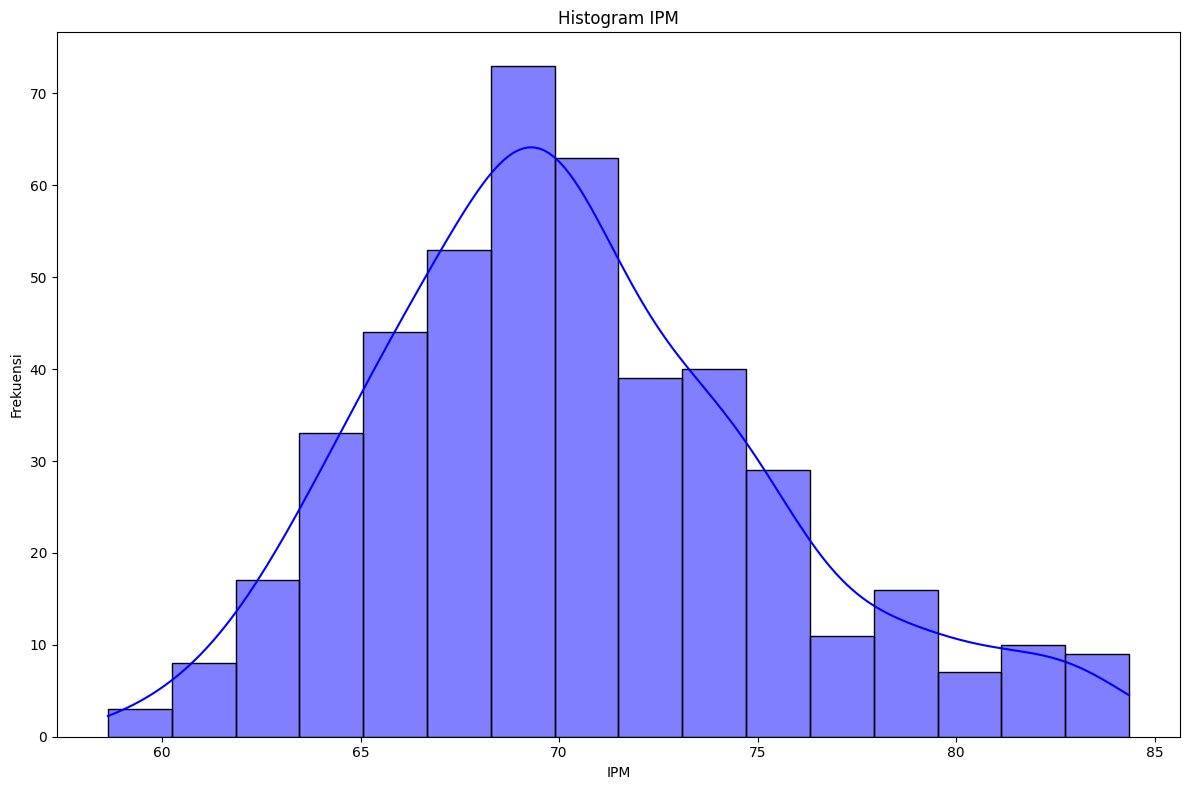

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(df['IPM'], kde=True, color='blue', edgecolor='k')
plt.title('Histogram IPM')
plt.xlabel('IPM')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

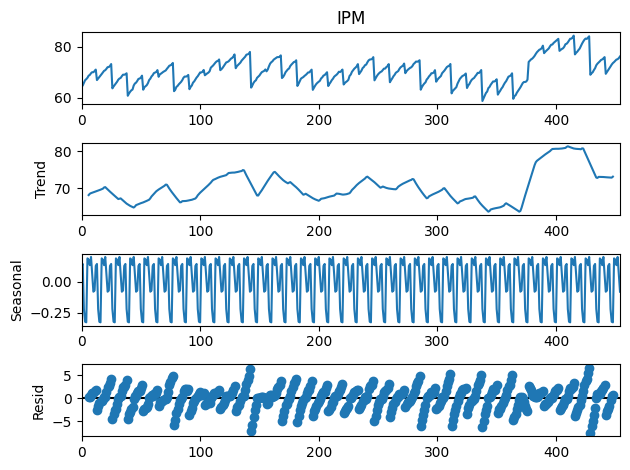

In [ ]:
result = seasonal_decompose(df['IPM'], model='additive', period=12)
fig = result.plot()
plt.show()